# 🎯Let's Wrap Up Phase 0 Efficiently
> Today = Finish loose ends, 
> Tomorrow = Consolidate, 
> Then = Full speed into Generative AI! 🚀

## 📋 Today's Compact Session (45-60 min)
### What We'll Cover:

- tf.data API (20 min) - Efficient data loading
- TensorBoard (15 min) - Professional visualization
- Phase 0 Summary (10 min) - What you've mastered
- Tomorrow's Consolidation Guide (10 min) - Study plan

Let's make this **practical and concise!**

In [1]:
"""
Phase 0 Completion: The Essential Tools
- tf.data API for efficient data pipelines
- TensorBoard for professional visualization
- Best practices summary

"""

'\nPhase 0 Completion: The Essential Tools\n- tf.data API for efficient data pipelines\n- TensorBoard for professional visualization\n- Best practices summary\n\n'

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.20.0


In [3]:
# ============================================
# PART 1: tf.data API - Efficient Data Loading
# ============================================

In [4]:
print("\n" + "="*60)
print("📦 PART 1: tf.data API - Professional Data Pipelines")
print("="*60)


📦 PART 1: tf.data API - Professional Data Pipelines


### WHY tf.data API?

Your current approach:
```py
  x_train = load_all_data_into_memory()  # ← 60,000 images loaded at once!
  for batch in manual_batching(x_train):  # Manual batching
      train(batch)
```

**Problems:**
- ❌ All data in RAM (doesn't scale to large datasets)
- ❌ No prefetching (GPU waits for CPU)
- ❌ No parallelization (slow data loading)
- ❌ Manual shuffling/batching code

**`tf.data Solution:`**
```py
  dataset = tf.data.Dataset.from_tensor_slices(x_train)
  dataset = dataset.shuffle(buffer_size).batch(batch_size).prefetch(1)
```
**Benefits:**
- ✅ Efficient memory usage (loads on-demand)
- ✅ GPU/CPU overlap (prefetching)
- ✅ Automatic batching/shuffling
- ✅ Works with huge datasets (doesn't fit in RAM)


In [5]:
# Load MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [6]:
print("\n" + "-"*60)
print("Method 1: Basic tf.data Pipeline")
print("-"*60)


------------------------------------------------------------
Method 1: Basic tf.data Pipeline
------------------------------------------------------------


In [7]:
# Create dataset from tensors
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

In [8]:
# Apply transformations
BATCH_SIZE = 128
BUFFER_SIZE = 10000

train_dataset = train_dataset.shuffle(BUFFER_SIZE)  # Shuffle
train_dataset = train_dataset.batch(BATCH_SIZE)     # Batch
train_dataset = train_dataset.prefetch(1)           # Prefetch next batch

In [9]:
print(f"✓ Created tf.data pipeline:")
print(f"  - Shuffle buffer: {BUFFER_SIZE}")
print(f"  - Batch size: {BATCH_SIZE}")
print(f"  - Prefetching: 1 batch ahead")

✓ Created tf.data pipeline:
  - Shuffle buffer: 10000
  - Batch size: 128
  - Prefetching: 1 batch ahead


In [10]:
# Create test dataset (no shuffling needed)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(1)

In [11]:
print("\n💡 Key Concepts:")
print("  • shuffle(): Randomizes order (prevents overfitting)")
print("  • batch(): Groups samples into batches")
print("  • prefetch(): Loads next batch while GPU processes current batch")


💡 Key Concepts:
  • shuffle(): Randomizes order (prevents overfitting)
  • batch(): Groups samples into batches
  • prefetch(): Loads next batch while GPU processes current batch


In [12]:
print("\n" + "-"*60)
print("Method 2: Data Augmentation with tf.data")
print("-"*60)


------------------------------------------------------------
Method 2: Data Augmentation with tf.data
------------------------------------------------------------


In [13]:
print("""
Data Augmentation = Artificially expand dataset by transforming images
- Rotation: ±15 degrees
- Zoom: 80-120%
- Shift: ±10%
- Flip: Horizontal (not for digits!)

This prevents overfitting and improves generalization!
""")


Data Augmentation = Artificially expand dataset by transforming images
- Rotation: ±15 degrees
- Zoom: 80-120%
- Shift: ±10%
- Flip: Horizontal (not for digits!)

This prevents overfitting and improves generalization!



In [14]:
# Data augmentation function
def augment_image(image, label):
    """Apply random augmentations to image"""
    # Random rotation (-0.1 to 0.1 radians ≈ ±6 degrees)
    image = tf.image.rot90(image, k=tf.random.uniform([], 0, 4, dtype=tf.int32))
    
    # Random brightness
    image = tf.image.random_brightness(image, max_delta=0.1)
    
    # Random contrast
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
    
    # Ensure values stay in [0, 1]
    image = tf.clip_by_value(image, 0.0, 1.0)
    
    return image, label

In [15]:
# Create augmented dataset
train_dataset_augmented = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset_augmented = train_dataset_augmented.map(
    augment_image, 
    num_parallel_calls=tf.data.AUTOTUNE  # Parallel processing!
)
train_dataset_augmented = train_dataset_augmented.shuffle(BUFFER_SIZE)
train_dataset_augmented = train_dataset_augmented.batch(BATCH_SIZE)
train_dataset_augmented = train_dataset_augmented.prefetch(tf.data.AUTOTUNE)

In [16]:
print("✓ Created augmented dataset with:")
print("  - Random rotations")
print("  - Random brightness/contrast")
print("  - Parallel processing (AUTOTUNE)")

✓ Created augmented dataset with:
  - Random rotations
  - Random brightness/contrast
  - Parallel processing (AUTOTUNE)



📸 Visualizing Augmentation Effect:
✓ Saved to 'data_augmentation_example.png'


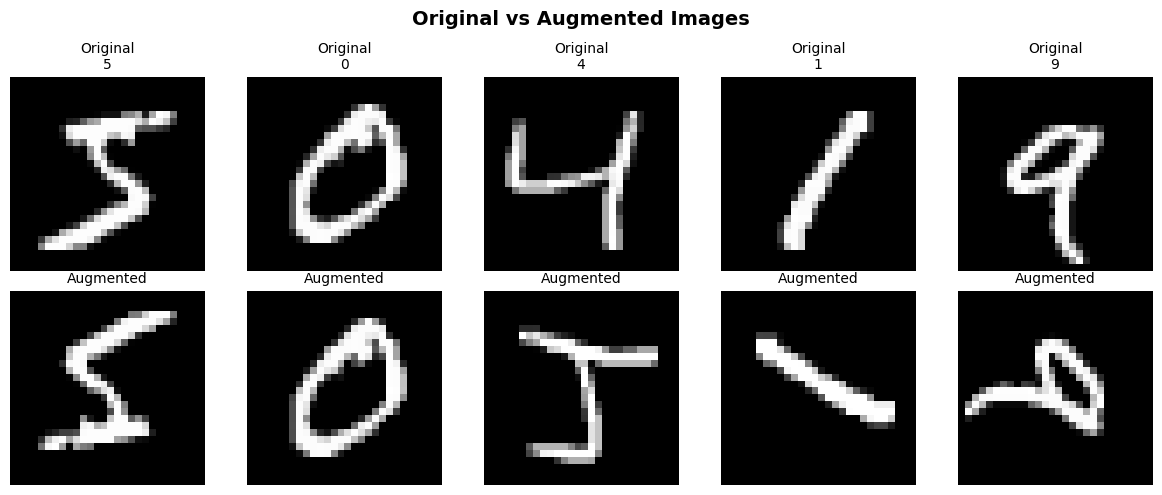

In [17]:
# Visualize augmentation
print("\n📸 Visualizing Augmentation Effect:")
sample_images = x_train[:5]
sample_labels = y_train[:5]

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Original vs Augmented Images', fontsize=14, fontweight='bold')

for i in range(5):
    # Original
    axes[0, i].imshow(sample_images[i, :, :, 0], cmap='gray')
    axes[0, i].set_title(f'Original\n{np.argmax(sample_labels[i])}', fontsize=10)
    axes[0, i].axis('off')
    
    # Augmented
    aug_img, _ = augment_image(sample_images[i], sample_labels[i])
    axes[1, i].imshow(aug_img.numpy()[:, :, 0], cmap='gray')
    axes[1, i].set_title('Augmented', fontsize=10)
    axes[1, i].axis('off')

plt.tight_layout()
plt.savefig('data_augmentation_example.png', dpi=150, bbox_inches='tight')
print("✓ Saved to 'data_augmentation_example.png'")
plt.show()
plt.close()

In [18]:
print("\n" + "-"*60)
print("Method 3: Using tf.data with Model Training")
print("-"*60)


------------------------------------------------------------
Method 3: Using tf.data with Model Training
------------------------------------------------------------


In [19]:
# Build simple CNN
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),  # Regularization
    keras.layers.Dense(10, activation='softmax')
])

c:\Users\kumar\Desktop\KP Programming\AI\Gen_AI\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
print("✓ Model ready")
print("\n🚀 Training with tf.data pipeline:")
print("(This is much cleaner than manual batching!)")

✓ Model ready

🚀 Training with tf.data pipeline:
(This is much cleaner than manual batching!)


In [22]:
# Train with tf.data (commented to save time - uncomment to run)
history = model.fit(
    train_dataset_augmented,  # ← tf.data dataset!
    epochs=3,
    validation_data=test_dataset,
    verbose=1
)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 46ms/step - accuracy: 0.7427 - loss: 0.7822 - val_accuracy: 0.9159 - val_loss: 0.2652
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 70ms/step - accuracy: 0.8904 - loss: 0.3515 - val_accuracy: 0.9500 - val_loss: 0.1605
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9159 - loss: 0.2753 - val_accuracy: 0.9639 - val_loss: 0.1201


In [23]:
print("""
✓ Notice how clean the training code is!
  No manual batching, no manual shuffling - tf.data handles everything.

Comparison:
  Manual:  for i in range(0, len(x), batch_size): ...
  tf.data: model.fit(dataset, epochs=3)  ← That's it!
""")


✓ Notice how clean the training code is!
  No manual batching, no manual shuffling - tf.data handles everything.

Comparison:
  Manual:  for i in range(0, len(x), batch_size): ...
  tf.data: model.fit(dataset, epochs=3)  ← That's it!



In [24]:
# ============================================
# PART 2: TensorBoard - Professional Visualization
# ============================================

In [25]:
print("\n" + "="*60)
print("📊 PART 2: TensorBoard - Professional ML Visualization")
print("="*60)


📊 PART 2: TensorBoard - Professional ML Visualization


### WHY TensorBoard?

Your current visualization:
  - matplotlib plots (static)
  - Manual tracking of metrics
  - No real-time monitoring
  - Hard to compare experiments

TensorBoard gives you:
- ✅ Real-time training monitoring
- ✅ Interactive graphs (zoom, pan, compare)
- ✅ Model architecture visualization
- ✅ Histogram of weights/gradients
- ✅ Embedding projections (t-SNE, PCA)
- ✅ Compare multiple runs

In [26]:
# Create log directory
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
os.makedirs(log_dir, exist_ok=True)

print(f"\n📁 Created log directory: {log_dir}")


📁 Created log directory: logs/fit/20251008-191041


In [27]:
# TensorBoard callback
tensorboard_callback = keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,  # Log weight histograms every epoch
    write_graph=True,  # Visualize model architecture
    write_images=True, # Log model weights as images
    update_freq='epoch',
    profile_batch='500,520'  # Profile performance
)

print("\n✓ TensorBoard callback configured")


✓ TensorBoard callback configured


### 📈 TensorBoard Features:

1. SCALARS: Track metrics over time
   - Training loss, accuracy
   - Validation loss, accuracy
   - Learning rate
   - Custom metrics

2. GRAPHS: Model architecture visualization
   - See your model as a computational graph
   - Understand layer connections

3. DISTRIBUTIONS: Weight/gradient histograms
   - Monitor if weights are learning
   - Detect vanishing/exploding gradients

4. IMAGES: Visualize predictions
   - See what model gets wrong
   - Track improvement over epochs

5. PROJECTOR: Embedding visualization
   - t-SNE/PCA of learned representations
   - See how model clusters data

In [28]:
# Train with TensorBoard (commented - uncomment to run)
print("\n🚀 To use TensorBoard:")
print("1. Train model with callback:")
print("   history = model.fit(dataset, callbacks=[tensorboard_callback])")
print("\n2. Launch TensorBoard:")
print("   tensorboard --logdir=logs/fit")
print("\n3. Open in browser:")
print("   http://localhost:6006")


🚀 To use TensorBoard:
1. Train model with callback:
   history = model.fit(dataset, callbacks=[tensorboard_callback])

2. Launch TensorBoard:
   tensorboard --logdir=logs/fit

3. Open in browser:
   http://localhost:6006


In [29]:
# Simulate training for demo
print("\n" + "-"*60)
print("Demo: Custom Logging to TensorBoard")
print("-"*60)


------------------------------------------------------------
Demo: Custom Logging to TensorBoard
------------------------------------------------------------


In [30]:
# Create summary writers
train_log_dir = log_dir + '/train'
test_log_dir = log_dir + '/test'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)
test_summary_writer = tf.summary.create_file_writer(test_log_dir)

print("✓ Created summary writers")

✓ Created summary writers


In [31]:
# Simulate logging (in real training, this happens automatically)
print("\n💡 Custom Logging Example:")
print("   with train_summary_writer.as_default():")
print("       tf.summary.scalar('loss', loss_value, step=epoch)")
print("       tf.summary.scalar('accuracy', acc_value, step=epoch)")


💡 Custom Logging Example:
   with train_summary_writer.as_default():
       tf.summary.scalar('loss', loss_value, step=epoch)
       tf.summary.scalar('accuracy', acc_value, step=epoch)



### Advanced TensorBoard Usage:

1. Compare Multiple Runs:
   - Train with different hyperparameters
   - Each run saves to different directory
   - TensorBoard overlays all runs!

2. Monitor Training in Real-Time:
   - Start TensorBoard before training
   - Watch metrics update live
   - Stop training early if overfitting

3. Debug Model:
   - Check weight histograms
   - Ensure gradients are flowing
   - Visualize layer outputs

4. Share Results:
   - TensorBoard logs are portable
   - Share with team/advisor
   - Include in reports

In [32]:
# ============================================
# PART 3: Best Practices Summary
# ============================================

In [33]:
print("\n" + "="*60)
print("🎯 PART 3: Best Practices for Production ML")
print("="*60)


🎯 PART 3: Best Practices for Production ML


In [36]:
best_practices = """
DATA PIPELINE:
✓ Use tf.data for efficient loading
✓ Apply augmentation for small datasets
✓ Prefetch for GPU/CPU overlap
✓ Use AUTOTUNE for automatic optimization

TRAINING:
✓ Use callbacks (EarlyStopping, ModelCheckpoint, TensorBoard)
✓ Monitor validation metrics (not just training)
✓ Save best model, not last model
✓ Use learning rate schedules

MODEL ARCHITECTURE:
✓ Start simple, add complexity if needed
✓ Use Dropout for regularization
✓ Batch normalization for deep networks
✓ Residual connections for very deep networks
"""

print(best_practices)


DATA PIPELINE:
✓ Use tf.data for efficient loading
✓ Apply augmentation for small datasets
✓ Prefetch for GPU/CPU overlap
✓ Use AUTOTUNE for automatic optimization

TRAINING:
✓ Use callbacks (EarlyStopping, ModelCheckpoint, TensorBoard)
✓ Monitor validation metrics (not just training)
✓ Save best model, not last model
✓ Use learning rate schedules

MODEL ARCHITECTURE:
✓ Start simple, add complexity if needed
✓ Use Dropout for regularization
✓ Batch normalization for deep networks
✓ Residual connections for very deep networks



In [35]:
# ============================================
# PART 4: Useful Callbacks Reference
# ============================================

In [37]:
print("\n" + "="*60)
print("🔧 PART 4: Essential Keras Callbacks")
print("="*60)


🔧 PART 4: Essential Keras Callbacks



1. **EarlyStopping** - Stop training when no improvement
   ```py
   early_stop = keras.callbacks.EarlyStopping(
       monitor='val_loss',
       patience=3,  # Stop if no improvement for 3 epochs
       restore_best_weights=True
   )
   ```

2. **ModelCheckpoint** - Save best model
   ```py
   checkpoint = keras.callbacks.ModelCheckpoint(
       'best_model.h5',
       monitor='val_accuracy',
       save_best_only=True,
       verbose=1
   )
   ```

3. **ReduceLROnPlateau** - Reduce learning rate when stuck
   ```py
   reduce_lr = keras.callbacks.ReduceLROnPlateau(
       monitor='val_loss',
       factor=0.5,  # Multiply LR by 0.5
       patience=2,
       min_lr=1e-7
   )
   ```

4. **TensorBoard** - Visualization
   ```py
   tensorboard = keras.callbacks.TensorBoard(
       log_dir='logs',
       histogram_freq=1
   )
   ```

5. **Custom Callback** - Your own logic
   ```py
   class CustomCallback(keras.callbacks.Callback):
       def on_epoch_end(self, epoch, logs=None):
           # Your custom code here
           pass
   ```

**Usage:**
   ```py
   callbacks = [early_stop, checkpoint, reduce_lr, tensorboard]
   model.fit(dataset, epochs=50, callbacks=callbacks)
   ```


In [38]:
# ============================================
# PART 5: Complete Example (Commented)
# ============================================

In [39]:
print("\n" + "="*60)
print("📝 PART 5: Complete Production Pipeline Template")
print("="*60)


📝 PART 5: Complete Production Pipeline Template


#### COMPLETE TEMPLATE - Copy this for future projects!

In [42]:
import tensorflow as tf
from tensorflow import keras
from datetime import datetime

# 1. CREATE DATA PIPELINE
def create_dataset(x, y, augment=False):
    dataset = tf.data.Dataset.from_tensor_slices((x, y))
    
    if augment:
        dataset = dataset.map(augment_image, num_parallel_calls=tf.data.AUTOTUNE)
    
    dataset = dataset.shuffle(10000)
    dataset = dataset.batch(128)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    
    return dataset

train_ds = create_dataset(x_train, y_train, augment=True)
val_ds = create_dataset(x_test, y_test, augment=False)

# 2. BUILD MODEL
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),  # Regularization
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 3. SETUP CALLBACKS
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3),
    keras.callbacks.TensorBoard(log_dir=f'logs/{datetime.now().strftime("%Y%m%d-%H%M%S")}')
]

# 4. TRAIN
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks
)

# 5. EVALUATE
test_loss, test_acc = model.evaluate(val_ds)
print(f'Test accuracy: {test_acc:.4f}')

# 6. VISUALIZE
# Launch TensorBoard: tensorboard --logdir=logs

Epoch 1/50


c:\Users\kumar\Desktop\KP Programming\AI\Gen_AI\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5761 - loss: 1.2308

469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 56ms/step - accuracy: 0.7389 - loss: 0.7947 - val_accuracy: 0.9266 - val_loss: 0.2412 - learning_rate: 0.0010
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.8822 - loss: 0.3828

469/469 ━━━━━━━━━━━━━━━━━━━━ 118s 250ms/step - accuracy: 0.8936 - loss: 0.3478 - val_accuracy: 0.9571 - val_loss: 0.1458 - learning_rate: 0.0010
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9158 - loss: 0.2799

469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 104ms/step - accuracy: 0.9208 - loss: 0.2632 - val_accuracy: 0.9586 - val_loss: 0.1301 - learning_rate: 0.0010
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9282 - loss: 0.2323

469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 99ms/step - accuracy: 0.9316 - loss: 0.2237 - val_accuracy: 0.9666 - val_loss: 0.1078 - learning_rate: 0.0010
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9392 - loss: 0.2041

469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 94ms/step - accuracy: 0.9412 - loss: 0.1976 - val_accuracy: 0.9712 - val_loss: 0.0886 - learning_rate: 0.0010
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9439 - loss: 0.1843

469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 85ms/step - accuracy: 0.9456 - loss: 0.1802 - val_accuracy: 0.9740 - val_loss: 0.0837 - learning_rate: 0.0010
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9495 - loss: 0.1669

469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 94ms/step - accuracy: 0.9501 - loss: 0.1649 - val_accuracy: 0.9772 - val_loss: 0.0765 - learning_rate: 0.0010
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 91ms/step - accuracy: 0.9522 - loss: 0.1557 - val_accuracy: 0.9754 - val_loss: 0.0775 - learning_rate: 0.0010
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9547 - loss: 0.1489

469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 93ms/step - accuracy: 0.9556 - loss: 0.1459 - val_accuracy: 0.9780 - val_loss: 0.0683 - learning_rate: 0.0010
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9576 - loss: 0.1379

469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 95ms/step - accuracy: 0.9590 - loss: 0.1355 - val_accuracy: 0.9780 - val_loss: 0.0660 - learning_rate: 0.0010
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 91ms/step - accuracy: 0.9606 - loss: 0.1301 - val_accuracy: 0.9778 - val_loss: 0.0672 - learning_rate: 0.0010
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 96ms/step - accuracy: 0.9627 - loss: 0.1247 - val_accuracy: 0.9783 - val_loss: 0.0691 - learning_rate: 0.0010
Epoch 13/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 94ms/step - accuracy: 0.9636 - loss: 0.1214 - val_accuracy: 0.9789 - val_loss: 0.0675 - learning_rate: 0.0010
Epoch 14/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9666 - loss: 0.1096

469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 95ms/step - accuracy: 0.9679 - loss: 0.1042 - val_accuracy: 0.9791 - val_loss: 0.0617 - learning_rate: 5.0000e-04
Epoch 15/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9691 - loss: 0.1019

469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 92ms/step - accuracy: 0.9699 - loss: 0.0996 - val_accuracy: 0.9809 - val_loss: 0.0601 - learning_rate: 5.0000e-04
Epoch 16/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9714 - loss: 0.0957

469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 91ms/step - accuracy: 0.9710 - loss: 0.0955 - val_accuracy: 0.9833 - val_loss: 0.0544 - learning_rate: 5.0000e-04
Epoch 17/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 112s 48ms/step - accuracy: 0.9711 - loss: 0.0963 - val_accuracy: 0.9817 - val_loss: 0.0592 - learning_rate: 5.0000e-04
Epoch 18/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9721 - loss: 0.0917 - val_accuracy: 0.9839 - val_loss: 0.0570 - learning_rate: 5.0000e-04
Epoch 19/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9724 - loss: 0.0911 - val_accuracy: 0.9833 - val_loss: 0.0580 - learning_rate: 5.0000e-04
Epoch 20/50
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9758 - loss: 0.0825

469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.9754 - loss: 0.0818 - val_accuracy: 0.9846 - val_loss: 0.0504 - learning_rate: 2.5000e-04
Epoch 21/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9765 - loss: 0.0779 - val_accuracy: 0.9837 - val_loss: 0.0540 - learning_rate: 2.5000e-04
Epoch 22/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.9768 - loss: 0.0786 - val_accuracy: 0.9845 - val_loss: 0.0520 - learning_rate: 2.5000e-04
Epoch 23/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9762 - loss: 0.0781 - val_accuracy: 0.9846 - val_loss: 0.0511 - learning_rate: 2.5000e-04
Epoch 24/50
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9776 - loss: 0.0745

469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.9775 - loss: 0.0751 - val_accuracy: 0.9846 - val_loss: 0.0496 - learning_rate: 1.2500e-04
Epoch 25/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9784 - loss: 0.0720 - val_accuracy: 0.9845 - val_loss: 0.0502 - learning_rate: 1.2500e-04
Epoch 26/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9790 - loss: 0.0711 - val_accuracy: 0.9849 - val_loss: 0.0503 - learning_rate: 1.2500e-04
Epoch 27/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.9784 - loss: 0.0711 - val_accuracy: 0.9854 - val_loss: 0.0510 - learning_rate: 1.2500e-04
Epoch 28/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9792 - loss: 0.0688 - val_accuracy: 0.9855 - val_loss: 0.0497 - learning_rate: 6.2500e-05
Epoch 29/50
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9791 - loss: 0.0675

469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9794 - loss: 0.0671 - val_accuracy: 0.9861 - val_loss: 0.0486 - learning_rate: 6.2500e-05
Epoch 30/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.9797 - loss: 0.0666 - val_accuracy: 0.9853 - val_loss: 0.0490 - learning_rate: 6.2500e-05
Epoch 31/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9800 - loss: 0.0669 - val_accuracy: 0.9850 - val_loss: 0.0497 - learning_rate: 6.2500e-05
Epoch 32/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9796 - loss: 0.0675 - val_accuracy: 0.9855 - val_loss: 0.0493 - learning_rate: 6.2500e-05
Epoch 33/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9809 - loss: 0.0641 - val_accuracy: 0.9855 - val_loss: 0.0493 - learning_rate: 3.1250e-05
Epoch 34/50
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9795 - loss: 0.0682

469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.9797 - loss: 0.0662 - val_accuracy: 0.9852 - val_loss: 0.0482 - learning_rate: 3.1250e-05
Epoch 35/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.9806 - loss: 0.0650 - val_accuracy: 0.9856 - val_loss: 0.0484 - learning_rate: 3.1250e-05
Epoch 36/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9798 - loss: 0.0656 - val_accuracy: 0.9857 - val_loss: 0.0482 - learning_rate: 3.1250e-05
Epoch 37/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.9804 - loss: 0.0645 - val_accuracy: 0.9855 - val_loss: 0.0488 - learning_rate: 3.1250e-05
Epoch 38/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.9806 - loss: 0.0645 - val_accuracy: 0.9857 - val_loss: 0.0491 - learning_rate: 1.5625e-05
Epoch 39/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9797 - loss: 0.0648 - val_accuracy: 0.9858 - val_loss: 0.0484 - learning_rate: 1.5625e-05
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9852

In [45]:
print("\n" + "="*60)
print("✨ Congratulations! Phase 0 Foundation is SOLID! ✨")
print("="*60)


✨ Congratulations! Phase 0 Foundation is SOLID! ✨
